In [ ]:
from google.colab import files
uploaded = files.upload()

#!wget --no-check-certificate https://drive.google.com/drive/folders/1Qt1HfSoTyCKiyDy2frR-hYOT9UvfwGq7 -O Online_Sales.csv
#!wget --no-check-certificate https://drive.google.com/drive/folders/1Qt1HfSoTyCKiyDy2frR-hYOT9UvfwGq7 -O Marketing_Spend.csv
#!wget --no-check-certificate https://drive.google.com/drive/folders/1Qt1HfSoTyCKiyDy2frR-hYOT9UvfwGq7 -O Discount_Coupon.csv
#!wget --no-check-certificate https://drive.google.com/drive/folders/1Qt1HfSoTyCKiyDy2frR-hYOT9UvfwGq7 -O CustomersData.xlsx

Saving CustomersData.xlsx to CustomersData.xlsx
Saving Discount_Coupon.csv to Discount_Coupon.csv
Saving Marketing_Spend.csv to Marketing_Spend.csv
Saving Online_Sales.csv to Online_Sales.csv


**Section 1: Acquisition Rate Analysis**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('Online_Sales.csv')
df.info()

#Convert Transaction_Date to datetime format:
#This ensures we can extract month and year from the transaction date.
df['Transaction_Date'] = pd.to_datetime(df['Transaction_Date'])


#Extract month and year into separate columns:
#This prepares the data to be grouped by both year and month.
df['Month'] = df['Transaction_Date'].dt.month
df['Year'] = df['Transaction_Date'].dt.year


#Group by year and month and count unique customers (acquisition rate):
monthly_acquisition = df.groupby(['Year', 'Month'])['CustomerID'].nunique().reset_index(name='Acquisition_Rate')
#groupby(['Year', 'Month']): Groups transactions by month.
#['CustomerID'].nunique(): Counts the number of unique customers, i.e., new acquisitions.
#reset_index(name='Acquisition_Rate'): Converts the result to a DataFrame.


#Identify the highest and lowest acquisition rates:
highest = monthly_acquisition.loc[monthly_acquisition['Acquisition_Rate'].idxmax()]
lowest = monthly_acquisition.loc[monthly_acquisition['Acquisition_Rate'].idxmin()]

print('The highest and lowest acquistion rates are respectively:', highest, lowest)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           52924 non-null  int64  
 1   Transaction_ID       52924 non-null  int64  
 2   Transaction_Date     52924 non-null  object 
 3   Product_SKU          52924 non-null  object 
 4   Product_Description  52924 non-null  object 
 5   Product_Category     52924 non-null  object 
 6   Quantity             52924 non-null  int64  
 7   Avg_Price            52924 non-null  float64
 8   Delivery_Charges     52924 non-null  float64
 9   Coupon_Status        52924 non-null  object 
dtypes: float64(2), int64(3), object(5)
memory usage: 4.0+ MB
The highest and lowest acquistion rates are respectively: Year                2019
Month                  8
Acquisition_Rate     300
Name: 7, dtype: int64 Year                2019
Month                  2
Acquisition_Rate     109

**#In the dataset:**
#**Highest acquisition rate** occurred in August 2019 with 300 new customers.
#**Lowest acquisition rat**e occurred in February 2019 with 109 new customers.

**Strategies to Address Fluctuations and Ensure Consistent Growth:**
Identify and Replicate High-Performance Periods:

1.   Analyze what marketing campaigns, promotions, or product launches happened in August.
2.   Replicate similar strategies in other months or schedule them during traditionally low periods.

Boost Marketing During Low-Performance Months:

1.  Use targeted advertising and promotions in slower months like February.
2.  Offer limited-time discounts or bundles to incentivize purchases.





Month
1     215.0
2     109.0
3     208.0
4     224.0
5     200.0
6     259.0
7     236.0
8     300.0
9     193.0
10    210.0
11    188.0
12    236.0
Name: Acquisition_Rate, dtype: float64


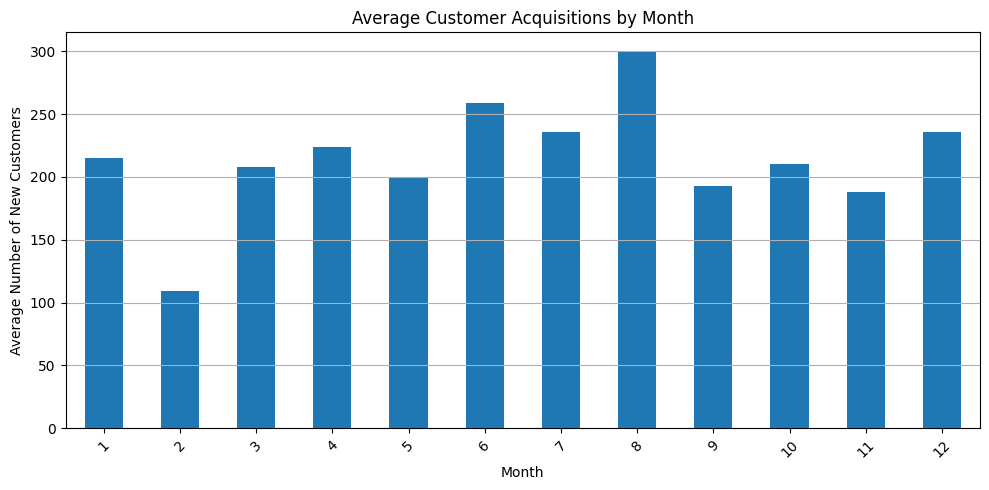

In [ ]:
# Average acquisitions per calendar month
avg_acquisitions_by_month = monthly_acquisition.groupby('Month')['Acquisition_Rate'].mean()
print(avg_acquisitions_by_month)

# Step: Plot the bar chart
plt.figure(figsize=(10, 5))
avg_acquisitions_by_month.plot(kind='bar')
plt.title('Average Customer Acquisitions by Month')
plt.xlabel('Month')
plt.ylabel('Average Number of New Customers')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

**Next Section:**

**Retention Calculation**: To calculate the number of *same* customers in consective months.

**Retention % or rate** = (*Same* customers in consecutive months/total customers in that month) * 100

In [ ]:
#Get a "Customer × Month matrix" where each cell shows how many times the customer appeared
 #(e.g., made a purchase or had activity) in that month.

# Create a customer-month matrix (number of purchases per customer per month)
customer_month_table = df.groupby(['CustomerID', 'Month']).size().unstack(fill_value=0)
print(customer_month_table)
#What above code line does:
  #groupby(['CustomerID', 'Month']): Groups data by both customer and month.
  #.size(): Counts how many rows (events) exist in each group.
  #.unstack(fill_value=0): Converts the Month from an index level to columns, creating a pivot table
    #Rows: CustomerID
    #Columns: Month
    #Values: number of events per customer per month
    #Fills missing entries with 0 (meaning no activity that month).

# Convert counts to binary: 1 if customer made a purchase in the month, 0 otherwise
# Convert that table to 1s and 0s
customer_month_binary = customer_month_table.applymap(lambda x: 1 if x > 0 else 0)
print(customer_month_binary)
#For DataFrames, use applymap() (element-wise) or apply() (row/column-wise).

# Calculate retention: how many customers purchased in a month AND the next month
retention_counts = (customer_month_binary.shift(-1, axis=1) & customer_month_binary).sum()
#The shift() function in Pandas is used to shift the values in a DataFrame or Series by a specified number of periods,
#either forward or backward along an axis (usually time-based data).
#It's commonly used in time series analysis, such as for calculating changes or comparisons between consecutive rows or columns.

#Total customers in a month:
total_customers_inMonth= customer_month_binary.sum()

#Retention Rate
retention = retention_counts/ total_customers_inMonth

#Min & Max Retention for a month
retention = retention.dropna()  # Remove last month (no "next month" to compare)
best_month = retention.idxmax()
worst_month = retention.idxmin()

print(f"Best retention: {best_month} with {retention[best_month]:.2%}")
print(f"Worst retention: {worst_month} with {retention[worst_month]:.2%}")

Month       1   2   3   4   5   6   7   8   9   10  11  12
CustomerID                                                
12346        0   0   0   0   0   0   0   0   2   0   0   0
12347        0   0  31   0   0   0   0   0   0   0  29   0
12348        0   0   0   0   0  17   0   0   0   6   0   0
12350        0   0   0   0   0   0   0   0   0   0   0  17
12356        0   0   0   0   0   0   0   0  36   0   0   0
...         ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..
18259        0   0   0   7   0   0   0   0   0   0   0   0
18260        0   0   0   0   0  11   0  26   0   3   0   0
18269        0   0   0   7   0   1   0   0   0   0   0   0
18277        0   0   0   0   0   0   0   0   0   1   0   0
18283        0   0   0   0   0   0  57   0   0  45   0   0

[1468 rows x 12 columns]
Month       1   2   3   4   5   6   7   8   9   10  11  12
CustomerID                                                
12346        0   0   0   0   0   0   0   0   1   0   0   0
12347        0   0   1   0   0

<ipython-input-4-02a7eba10ca3>:18: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  customer_month_binary = customer_month_table.applymap(lambda x: 1 if x > 0 else 0)



Strongest retention occurred in July 2019, with ~27.5% of customers returning in August.

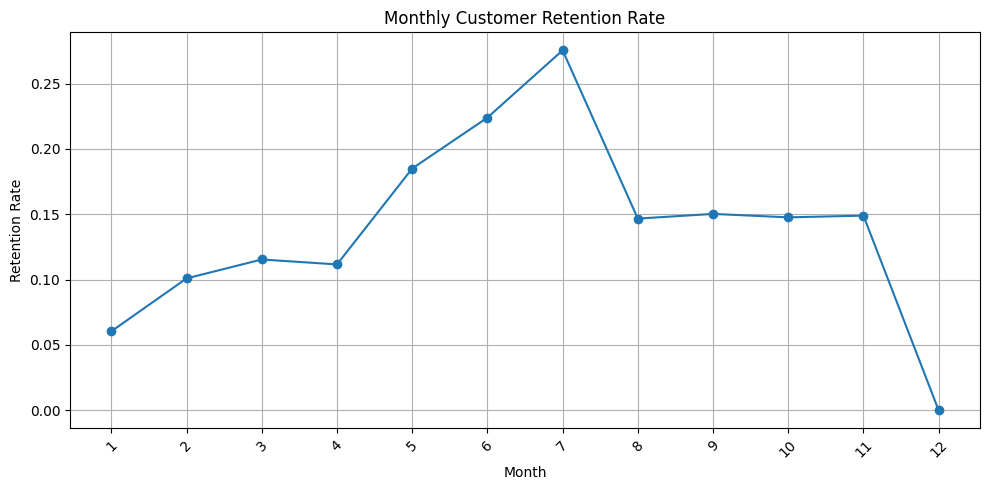

In [ ]:

# Step: Plot the retention rate
plt.figure(figsize=(10, 5))
plt.plot(retention.index.astype(str), retention.values, marker='o', linestyle='-')
plt.title('Monthly Customer Retention Rate')
plt.xlabel('Month')
plt.ylabel('Retention Rate')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

***Next Section: ***

**Analysis**: **Customer behavior** during high-retention months and suggest ways to replicate this success throughout the year.

In [ ]:
#pandas code that analyzes customer behavior in July 2019 (a high-retention month)
#and gives key insights like top products, categories, average quantity, and order value:

# Filter for the high-retention month (July 2019)
july_customers = df[df['Month'] == 7]

# Find the most popular products
popular_products = july_customers['Product_Description'].value_counts().head(5)
print("Top 5 Products in July 2019:")
print(popular_products)

# Find the most popular categories
popular_categories = july_customers['Product_Category'].value_counts().head(5)
print("\nTop 5 Categories in July 2019:")
print(popular_categories)

# Calculate total order value (quantity × price)
july_customers['Total_Value'] = july_customers['Quantity'] * july_customers['Avg_Price']

# Average quantity per order
avg_quantity = july_customers['Quantity'].mean()
print(f"\nAverage quantity per order in July 2019: {avg_quantity:.2f}")

# Average total value per order
avg_order_value = july_customers['Total_Value'].mean()
print(f"Average order value in July 2019: ${avg_order_value:.2f}")

Top 5 Products in July 2019:
Product_Description
Nest Cam Outdoor Security Camera - USA                    289
Nest Cam Indoor Security Camera - USA                     268
Nest Learning Thermostat 3rd Gen-USA - Stainless Steel    247
Google Sunglasses                                         172
Nest Learning Thermostat 3rd Gen-USA - White              127
Name: count, dtype: int64

Top 5 Categories in July 2019:
Product_Category
Apparel      2182
Nest-USA     1161
Office        549
Lifestyle     383
Drinkware     298
Name: count, dtype: int64

Average quantity per order in July 2019: 4.36
Average order value in July 2019: $70.97


<ipython-input-6-9f7247ee7792>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  july_customers['Total_Value'] = july_customers['Quantity'] * july_customers['Avg_Price']


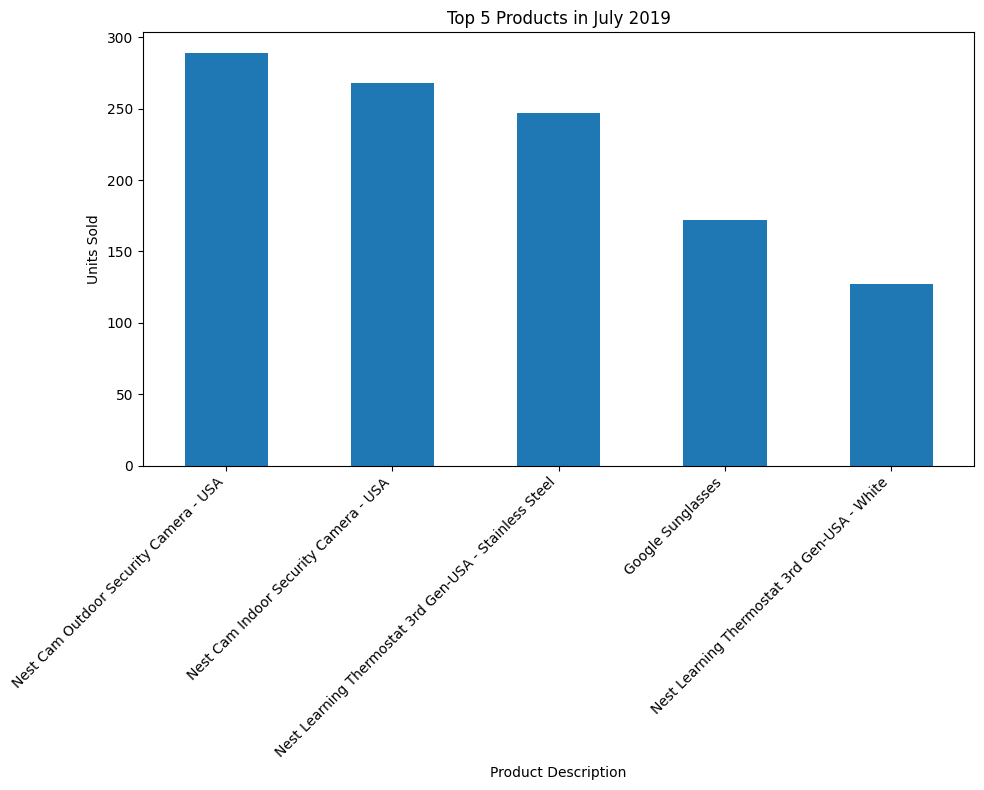

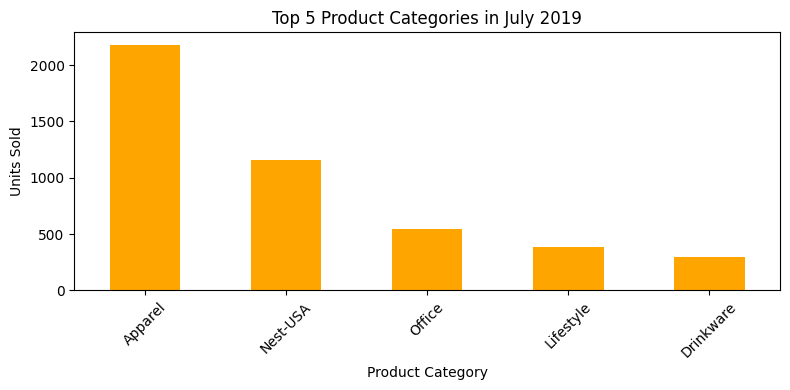

In [ ]:
# Step: Plot top 5 products
plt.figure(figsize=(10, 8))
popular_products.plot(kind='bar')
plt.title('Top 5 Products in July 2019')
plt.xlabel('Product Description')
plt.ylabel('Units Sold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Step: Plot top 5 categories
plt.figure(figsize=(8, 4))
popular_categories.plot(kind='bar', color='orange')
plt.title('Top 5 Product Categories in July 2019')
plt.xlabel('Product Category')
plt.ylabel('Units Sold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Strategies to Replicate Success Across the Year**
Promote Best-Selling Products Year-Round

1.   Highlight high-retention products (like Nest Cams) in off-peak months.
2.   Run monthly style or utility themes based on high-selling apparel & lifestyle items.
3. Replicate summer marketing strategies (used in July) during other seasons—adjusting messaging but maintaining tactics like limited-time offers.
4. Incentivize repeat purchases with points or credits, especially after high-value orders like in July.

**Next Section:**


Compare the revenue generated by new and existing customers month-over-month. What does this trend suggest about the balance between acquisition and retention efforts?

In [ ]:
# Step: Identify each customer's first purchase month by seeing min transaction month
first_purchase = df.groupby('CustomerID')['Month'].min()
df['AcquisitionMonth'] = df['CustomerID'].map(first_purchase)
df.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Month,Year,AcquisitionMonth
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,1,2019,1
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,1,2019,1
2,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used,1,2019,1
3,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used,1,2019,1
4,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used,1,2019,1


| Function     | Works On          | Applies To                             | Use Case                           |
| ------------ | ----------------- | -------------------------------------- | ---------------------------------- |
| `map()`      | Series            | Each element                           | Value transformation or mapping    |
| `apply()`    | Series, DataFrame | Series: element; DataFrame: row/column | Aggregation or row/column-wise ops |
| `applymap()` | DataFrame only    | Each element (cell)                    | Cell-by-cell transformation        |


In [ ]:
# Step: Label transactions as 'New' or 'Existing'
df['Customer_Type'] = df.apply(
    lambda row: 'New' if row['Month'] == row['AcquisitionMonth'] else 'Existing',
    axis=1
)

# Step: Calculate revenue for each transaction
df['Revenue'] = df['Quantity'] * df['Avg_Price']

df.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Month,Year,AcquisitionMonth,Customer_Type,Revenue
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,1,2019,1,New,153.71
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,1,2019,1,New,153.71
2,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used,1,2019,1,New,2.05
3,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used,1,2019,1,New,87.65
4,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used,1,2019,1,New,16.50


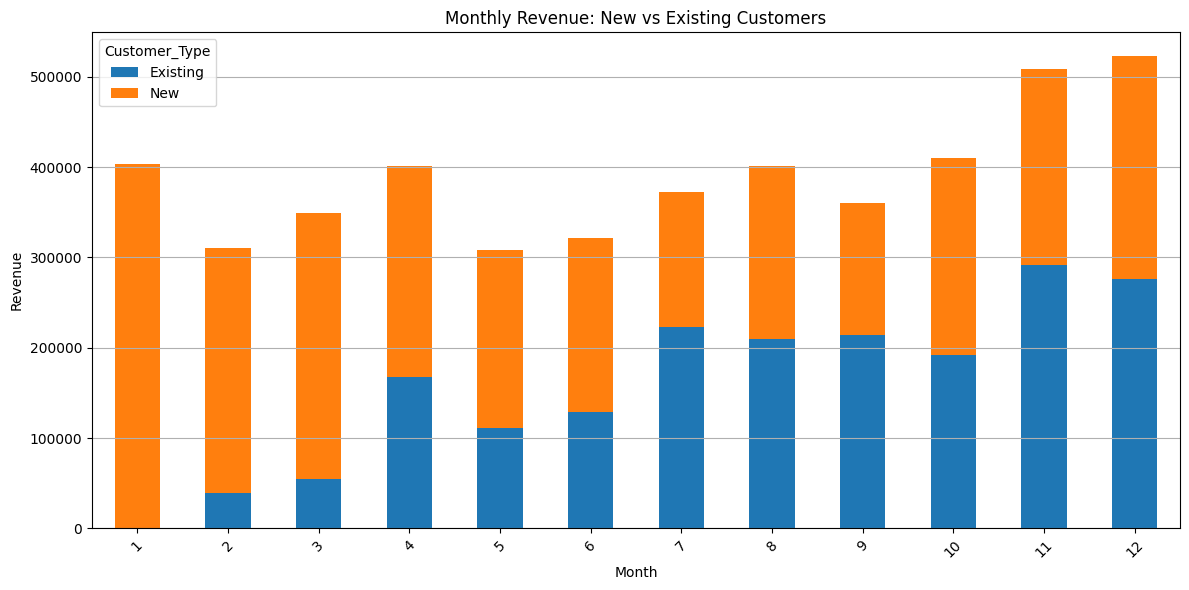

In [ ]:
# Step: Group by Month and Customer_Type to get monthly revenue
monthly_revenue = df.groupby(['Month', 'Customer_Type'])['Revenue'].sum().unstack(fill_value=0)

# Step: Plot revenue comparison
monthly_revenue.index = monthly_revenue.index.astype(str)  # Convert Period to string for x-axis
monthly_revenue.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Monthly Revenue: New vs Existing Customers')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

**Section:**

**Analyze the relationship between coupon usage and revenue generation. **

How can discount strategies be optimized to maximize revenue while maintaining profitability?

In [ ]:
# Step: Load the discount coupon dataset
coupon_df = pd.read_csv("Discount_Coupon.csv")
df.info()
coupon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CustomerID           52924 non-null  int64         
 1   Transaction_ID       52924 non-null  int64         
 2   Transaction_Date     52924 non-null  datetime64[ns]
 3   Product_SKU          52924 non-null  object        
 4   Product_Description  52924 non-null  object        
 5   Product_Category     52924 non-null  object        
 6   Quantity             52924 non-null  int64         
 7   Avg_Price            52924 non-null  float64       
 8   Delivery_Charges     52924 non-null  float64       
 9   Coupon_Status        52924 non-null  object        
 10  Month                52924 non-null  int32         
 11  Year                 52924 non-null  int32         
 12  AcquisitionMonth     52924 non-null  int32         
 13  Customer_Type        52924 non-

In [ ]:
# Convert the 'Month' column in coupon_df to datetime
coupon_df['Month'] = pd.to_datetime(df['Month']).dt.month
coupon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Month             204 non-null    int32 
 1   Product_Category  204 non-null    object
 2   Coupon_Code       204 non-null    object
 3   Discount_pct      204 non-null    int64 
dtypes: int32(1), int64(1), object(2)
memory usage: 5.7+ KB


In [ ]:
# Merge the DataFrames using the shared columns
merged_df = pd.merge(df, coupon_df, how='left', on=['Month', 'Product_Category'])

#validated the data is clean and only contains "Used" or "Not Used" values.
print(df['Coupon_Status'].value_counts(dropna=False))

#to avoid the 3rd type-"clicked" seen in output below
# Step: Create a new column to flag whether a coupon was used (to ensure there are only 2 values/clean data and not NA)
merged_df['Coupon_Used'] = merged_df['Coupon_Status'].apply(lambda x: 'Used' if x == 'Used' else 'Not Used')

#Calculate Revenue in first df dataframe
# Adjusted revenue = Revenue after applying discount percentage
merged_df['Effective_Revenue'] = merged_df.apply(
    lambda row: row['Revenue'] * (1 - row['Discount_pct'] / 100)
    if row['Coupon_Used'] == 'Used' and pd.notna(row['Discount_pct']) else row['Revenue'],
    axis=1
)
print(merged_df['Effective_Revenue'])

Coupon_Status
Clicked     26926
Used        17904
Not Used     8094
Name: count, dtype: int64
0        138.339
1        122.968
2        107.597
3        138.339
4        122.968
          ...   
97172    121.300
97173     48.920
97174    151.880
97175    402.600
97176    322.080
Name: Effective_Revenue, Length: 97177, dtype: float64


In [ ]:
# Then group and plot
revenue_by_discount_all = merged_df.groupby(['Discount_pct','Coupon_Used'])['Effective_Revenue'].mean()
#Total revenue
tot_rev = merged_df.groupby(['Discount_pct','Coupon_Used'])['Effective_Revenue'].sum()
print(revenue_by_discount_all)
print(tot_rev)

Discount_pct  Coupon_Used
10.0          Not Used       102.275398
              Used            85.216336
20.0          Not Used       102.275398
              Used            75.747854
30.0          Not Used       102.275398
              Used            66.279372
Name: Effective_Revenue, dtype: float64
Discount_pct  Coupon_Used
10.0          Not Used       1085346.52
              Used            466985.52
20.0          Not Used       1085346.52
              Used            415098.24
30.0          Not Used       1085346.52
              Used            363210.96
Name: Effective_Revenue, dtype: float64


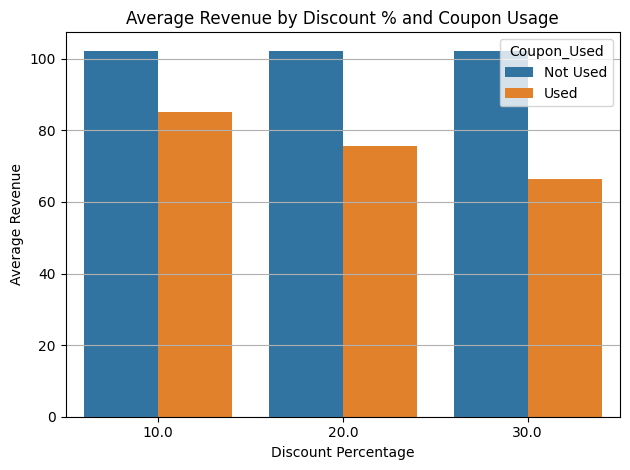

In [ ]:
plot_df = merged_df[
    merged_df['Discount_pct'].notna()
].groupby(['Discount_pct', 'Coupon_Used'])['Effective_Revenue'].mean().reset_index()

#Plot the comparison
sns.barplot(data=plot_df, x='Discount_pct', y='Effective_Revenue', hue='Coupon_Used')
plt.title('Average Revenue by Discount % and Coupon Usage')
plt.xlabel('Discount Percentage')
plt.ylabel('Average Revenue')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

**Next Section: **

**Analyze the relationship between monthly marketing spend and revenue**.
Are there any months where marketing efforts yielded disproportionately high or low returns? How can marketing strategies be adjusted to improve ROI?

In [ ]:
marketing_df = pd.read_csv("Marketing_Spend.csv")
marketing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           365 non-null    object 
 1   Offline_Spend  365 non-null    int64  
 2   Online_Spend   365 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 8.7+ KB


In [ ]:
# Step 1: Prepare the marketing data
marketing_df['Date'] = pd.to_datetime(marketing_df['Date'])
marketing_df['Month'] = marketing_df['Date'].dt.month
marketing_df['Total_Spend'] = marketing_df['Offline_Spend'] + marketing_df['Online_Spend']

# Step 2: Aggregate monthly data
monthly_spend = marketing_df.groupby('Month')['Total_Spend'].sum()
monthly_revenue = df.groupby('Month')['Revenue'].sum()

# Step 3: Combine into a single DataFrame
roi_df = pd.DataFrame({
    'Marketing_Spend': monthly_spend,
    'Revenue': monthly_revenue
})

# Step 4: Calculate ROI
roi_df['ROI'] = roi_df['Revenue'] / roi_df['Marketing_Spend']

# View the result
print(roi_df.reset_index())

    Month  Marketing_Spend    Revenue       ROI
0       1        154928.95  403624.58  2.605224
1       2        137107.92  310819.80  2.266972
2       3        122250.09  349608.09  2.859778
3       4        157026.83  401618.42  2.557642
4       5        118259.64  307763.42  2.602438
5       6        134318.14  321081.38  2.390454
6       7        120217.85  372638.07  3.099690
7       8        142904.15  401210.37  2.807549
8       9        135514.54  360548.40  2.660588
9      10        151224.65  409681.28  2.709091
10     11        161144.96  508942.62  3.158291
11     12        198648.75  523258.19  2.634088


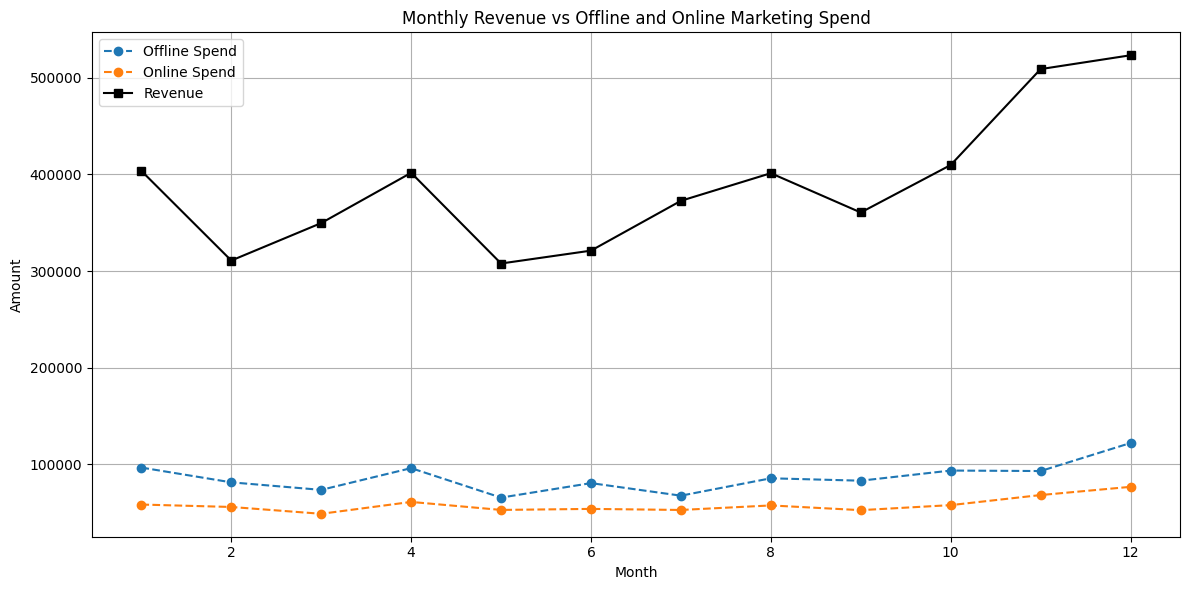

In [ ]:
#Step 4: Aggregate monthly offline/online spend and revenue
monthly_channel_spend = marketing_df.groupby('Month')[['Offline_Spend', 'Online_Spend']].sum()
monthly_revenue = df.groupby('Month')['Revenue'].sum()

# Step 5: Plot revenue vs. channel spend
plt.figure(figsize=(12, 6))
monthly_channel_spend['Offline_Spend'].plot(label='Offline Spend', linestyle='--', marker='o')
monthly_channel_spend['Online_Spend'].plot(label='Online Spend', linestyle='--', marker='o')
monthly_revenue.plot(label='Revenue', linestyle='-', marker='s', color='black')

plt.title('Monthly Revenue vs Offline and Online Marketing Spend')
plt.xlabel('Month')
plt.ylabel('Amount')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**Insights**:


1.  November–December shows a sharp rise in revenue without a proportional spike in marketing spend → great ROI.
2.   May and September had relatively low revenue despite consistent spend → may indicate inefficiency or campaign mismatch.
3. Offline spend consistently dominates; if online conversions are stronger, consider reallocating some budget.

**Next Section:**

Evaluate the **effectiveness of marketing campaigns** by comparing marketing spend to revenue generated. Are there opportunities to reallocate resources for better results?

In [ ]:
#Combine spend and revenue into a single DataFrame
effectiveness_df = pd.DataFrame({
    'Offline_Spend': monthly_channel_spend['Offline_Spend'],
    'Online_Spend': monthly_channel_spend['Online_Spend'],
    'Revenue': monthly_revenue
})

#Step 2: Calculate ROI (Revenue / Spend) per channel
effectiveness_df['Offline_ROI'] = effectiveness_df['Revenue'] / effectiveness_df['Offline_Spend']
effectiveness_df['Online_ROI'] = effectiveness_df['Revenue'] / effectiveness_df['Online_Spend']

# Step 3: Optional — view the DataFrame
print(effectiveness_df.reset_index())

    Month  Offline_Spend  Online_Spend    Revenue  Offline_ROI  Online_ROI
0       1          96600      58328.95  403624.58     4.178308    6.919798
1       2          81300      55807.92  310819.80     3.823122    5.569457
2       3          73500      48750.09  349608.09     4.756573    7.171435
3       4          96000      61026.83  401618.42     4.183525    6.581014
4       5          65500      52759.64  307763.42     4.698678    5.833312
5       6          80500      53818.14  321081.38     3.988589    5.966044
6       7          67500      52717.85  372638.07     5.520564    7.068537
7       8          85500      57404.15  401210.37     4.692519    6.989222
8       9          83000      52514.54  360548.40     4.343957    6.865687
9      10          93500      57724.65  409681.28     4.381618    7.097164
10     11          93000      68144.96  508942.62     5.472501    7.468529
11     12         122000      76648.75  523258.19     4.289002    6.826702


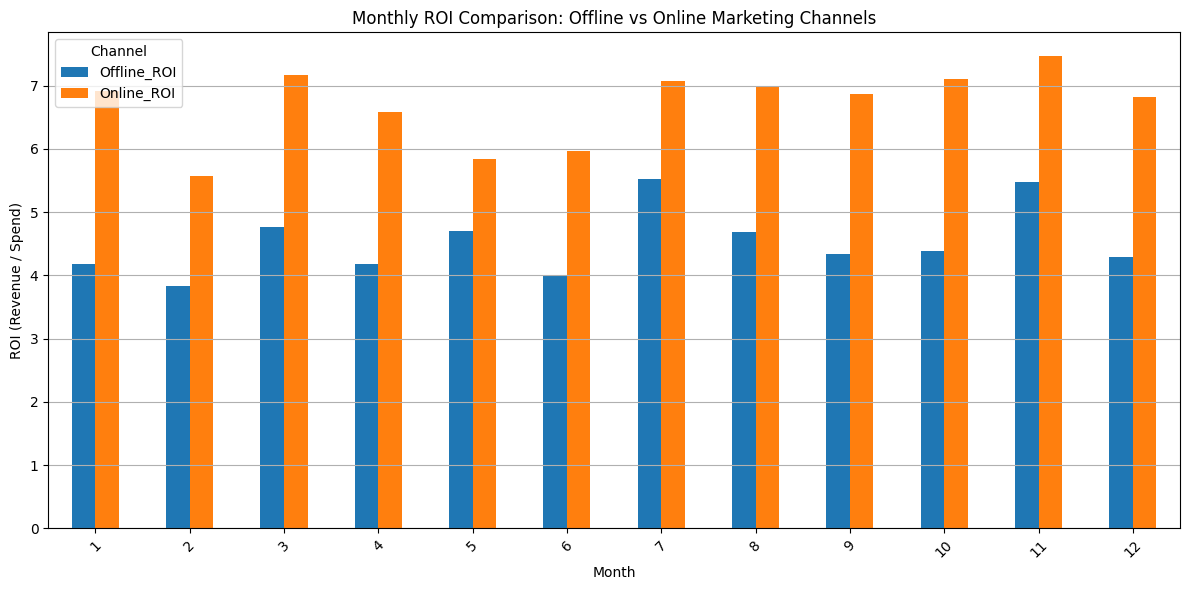

In [ ]:
#Plot ROI comparison
effectiveness_df[['Offline_ROI', 'Online_ROI']].plot(kind='bar', figsize=(12, 6))
plt.title('Monthly ROI Comparison: Offline vs Online Marketing Channels')
plt.xlabel('Month')
plt.ylabel('ROI (Revenue / Spend)')
plt.xticks(ticks=range(len(effectiveness_df)), labels=effectiveness_df.index.astype(str), rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.legend(title='Channel')
plt.show()#

**Opportunities to Reallocate Resources:**
Consider shifting budget from offline to online where ROI consistently favors digital.

**Key Insights:**
- Online marketing consistently outperforms offline in ROI across most months.
- In some months, offline ROI dips significantly, suggesting room to cut or optimize spend.
- Months like March show excellent performance for both channels — good candidates for scaling investment.

**Next Section:**

Segment customers into groups such as Premium, Gold, Silver, and Standard. What targeted strategies can be developed for each segment to improve retention and revenue? (Use **RFM segmentation techniques**)

In [ ]:
#Step: Set snapshot date
snapshot_date = df['Transaction_Date'].max() + pd.Timedelta(days=1)
#This is the "current" date used to measure how recent the last purchase was. (One day after the most recent transaction.)
#to avoid getting 0 for latest transaction recency; hence 1 is added

#Aggregate RFM metrics per customer
rfm = df.groupby('CustomerID').agg({
    'Transaction_ID': 'nunique',
    'Revenue': 'sum',
    'Transaction_Date': 'max'
}).rename(columns={
    'Transaction_ID': 'Frequency',
    'Revenue': 'Monetary',
    'Transaction_Date': 'LastPurchaseDate'
})

rfm['Recency'] = (snapshot_date - rfm['LastPurchaseDate']).dt.days
rfm = rfm.drop(columns='LastPurchaseDate')

#Score each metric using quartiles
rfm['R_Score'] = pd.qcut(rfm['Recency'], 4, labels=[4, 3, 2, 1])
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 4, labels=[1, 2, 3, 4])
rfm['M_Score'] = pd.qcut(df['Revenue'], 4, labels=[1, 2, 3, 4])
#pd.cut() — Equal-width binning
#pd.qcut() — Quantile-based binning

| Feature           | `pd.cut()`                   | `pd.qcut()`                       |
| ----------------- | ---------------------------- | --------------------------------- |
| Type of binning   | Equal-width                  | Equal-frequency (quantiles)       |
| Input to bins     | Number of bins or bin edges  | Number of quantiles (e.g., `q=4`) |
| Bin size          | Varies depending on data     | Equal number of elements per bin  |
| Useful for        | Fixed intervals (e.g., ages) | Percentile-based grouping         |
| Handles outliers? | No                           | Better (quantile-based)           |


In [ ]:
#Calculate total RFM score and assign segment
rfm['RFM_Score'] = rfm['R_Score'].astype(int) + rfm['F_Score'].astype(int) + rfm['M_Score'].astype(int)

def segment_customer(score):
    if score >= 10:
        return 'Premium'
    elif score >= 7:
        return 'Gold'
    elif score >= 4:
        return 'Silver'
    else:
        return 'Standard'

rfm['Segment'] = rfm['RFM_Score'].apply(segment_customer)

#View the segmented data
print(rfm.reset_index())

      CustomerID  Frequency  Monetary  Recency R_Score F_Score M_Score  \
0          12346          1     30.99      108       3       1       4   
1          12347         31  13834.90       60       3       4       3   
2          12348          8   1442.12       74       3       2       3   
3          12350         11   1360.07       18       4       2       4   
4          12356         13   1442.47      108       3       3       1   
...          ...        ...       ...      ...     ...     ...     ...   
1463       18259          3    544.34      271       1       1       2   
1464       18260         19   2363.05       88       3       3       2   
1465       18269          2    101.56      195       2       1       2   
1466       18277          1    298.00       70       3       1       2   
1467       18283         53   6362.77       83       3       4       3   

      RFM_Score  Segment  
0             8     Gold  
1            10  Premium  
2             8     Gold  
3  

| Segment      | Characteristics                         | Strategy to Improve Retention & Revenue                                  |
| ------------ | --------------------------------------- | ------------------------------------------------------------------------ |
| **Premium**  | Recent, frequent, high spenders         | VIP loyalty program, early access to launches, exclusive discounts    |
| **Gold**     | Active and moderately high value        | Bundled offers, personalized product suggestions, referral incentives |
| **Silver**   | Occasional buyers, moderate value       |  Re-engagement emails, cross-sell offers, limited-time promotions      |
| **Standard** | Infrequent, low-value, or old customers | Win-back campaigns, first-order discounts, exit-intent surveys        |


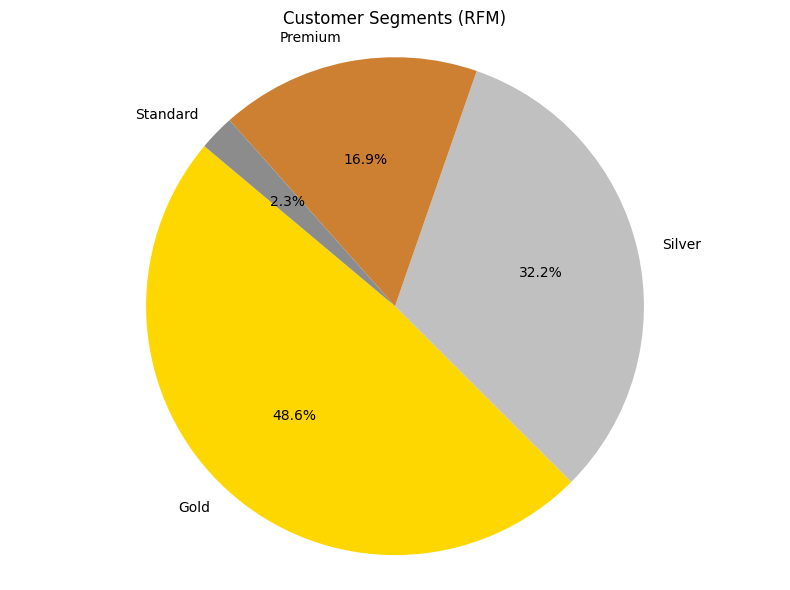

In [ ]:
#Count customers in each segment
segment_counts = rfm['Segment'].value_counts()

# Step 2: Plot pie chart
plt.figure(figsize=(8, 6))
plt.pie(
    segment_counts,
    labels=segment_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=['gold', 'silver', '#CD7F32', '#8c8c8c']  # Gold, Silver, Bronze, Grey
)
plt.title('Customer Segments (RFM)')
plt.axis('equal')  # Equal aspect ratio ensures pie is circular
plt.tight_layout()
plt.show()

**Next Section:**

Analyze the **revenue contribution of each customer segment**. How can the company focus its efforts on high-value segments while nurturing lower-value segments?

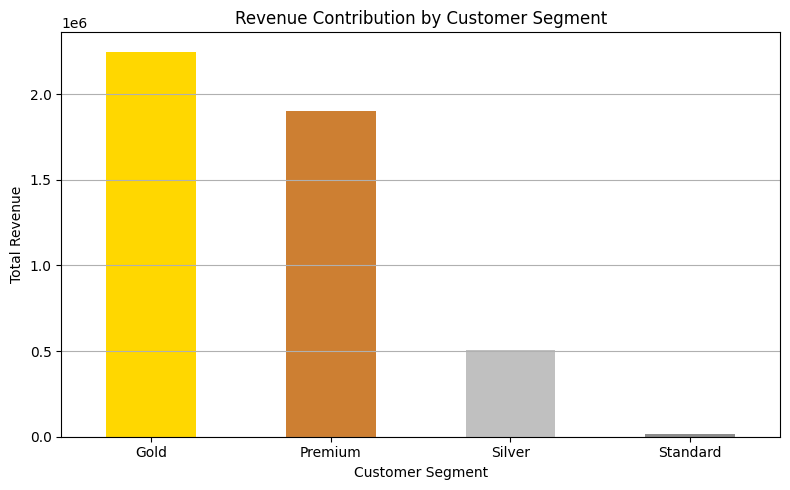

Segment
Gold        2248352.96
Premium     1904019.10
Silver       503645.31
Standard      14777.25
Name: Revenue, dtype: float64


In [ ]:
#Merge segment info with sales data
segment_revenue = df.merge(rfm['Segment'], on='CustomerID')
revenue_by_segment = segment_revenue.groupby('Segment')['Revenue'].sum().sort_values(ascending=False)

# Step 7: Plot revenue by segment
plt.figure(figsize=(8, 5))
revenue_by_segment.plot(kind='bar', color=['gold', '#CD7F32','silver', '#8c8c8c'])
plt.title('Revenue Contribution by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Total Revenue')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Optional: View or return revenue data
print(revenue_by_segment)

Next Section:

Group customers by their **month of first purchase** and **analyze retention** rates over time. Which **cohorts** exhibit the highest and lowest retention rates? What strategies can be implemented to improve retention for weaker cohorts?

CohortData: Cohort_Index       0   1   2   3   4   5   6   7   8   9   10  11
AcquisitionMonth                                                 
1                 215  13  24  34  23  44  35  47  23  28  20  34
2                  96   7   9  16  17  22  19  15  12  11  16   0
3                 177  18  35  25  32  33  22  22  15  19   0   0
4                 163  14  24  24  18  15  10  16  12   0   0   0
5                 112  12   9  13  10  13  14   8   0   0   0   0
6                 137  20  22  12  11  14  11   0   0   0   0   0
7                  94  13   4   6  11   9   0   0   0   0   0   0
8                 135  14  15  10   8   0   0   0   0   0   0   0
9                  78   6   3   2   0   0   0   0   0   0   0   0
10                 87   6   4   0   0   0   0   0   0   0   0   0
11                 68   7   0   0   0   0   0   0   0   0   0   0
12                106   0   0   0   0   0   0   0   0   0   0   0
Retention of cohorts: Cohort_Index       0      1      2      3 

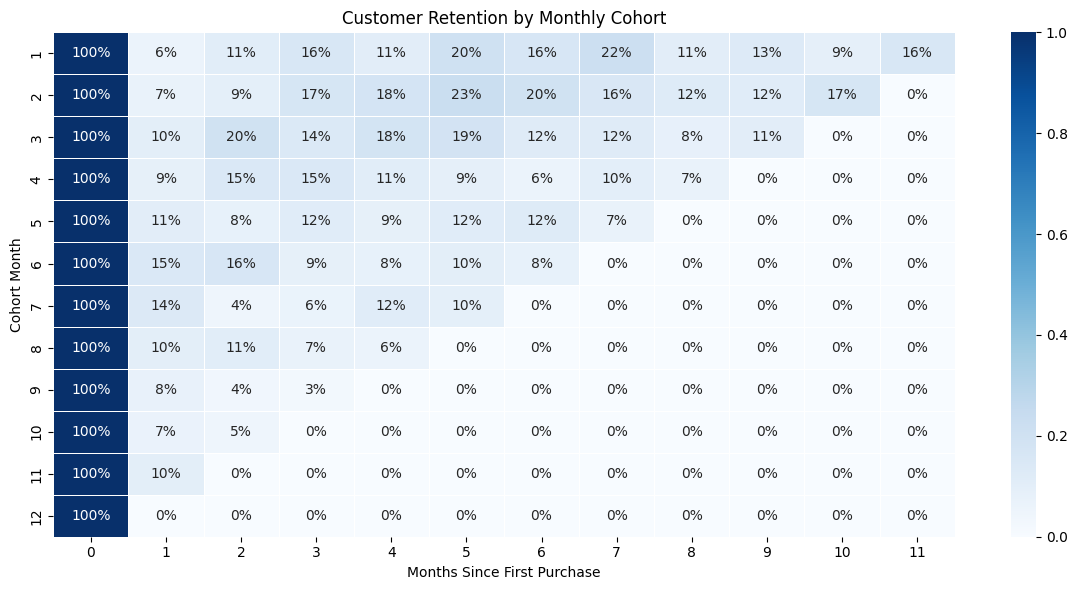

In [ ]:
# Step: Calculate cohort index (months since first purchase)
df['Cohort_Index'] = (df['Month'] - df['AcquisitionMonth'])

# Step: Build cohort table
cohort_data = df.groupby(['AcquisitionMonth', 'Cohort_Index'])['CustomerID'].nunique().unstack(fill_value=0)
print(f"CohortData: {cohort_data}")

# Step 5: Calculate retention rate
cohort_sizes = cohort_data.iloc[:, 0]
retention = cohort_data.divide(cohort_sizes, axis=0).round(3)
print(f"Retention of cohorts: {retention}")

# Step 6: Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(retention, annot=True, fmt=".0%", cmap="Blues", linewidths=0.5)
plt.title('Customer Retention by Monthly Cohort')
plt.xlabel('Months Since First Purchase')
plt.ylabel('Cohort Month')
plt.tight_layout()
plt.show()

**Interpretation:**
Cohort 2019-03 shows strong early retention:
~19.8% stayed into month 2, ~14.1% in month 3.

Cohort 2019-01 has long-term retention:
still ~15.8% of users retained by month 11 — impressive.

Cohort 2019-05 shows weaker retention beyond month 6, dropping to 0.



Analyze the **lifetime value of customers **acquired in different months. How can this insight inform acquisition and retention strategies?

0         1
1         1
2         1
3         1
4         1
         ..
52919    12
52920    12
52921    12
52922    12
52923    12
Name: Cohort_Month, Length: 52924, dtype: int32


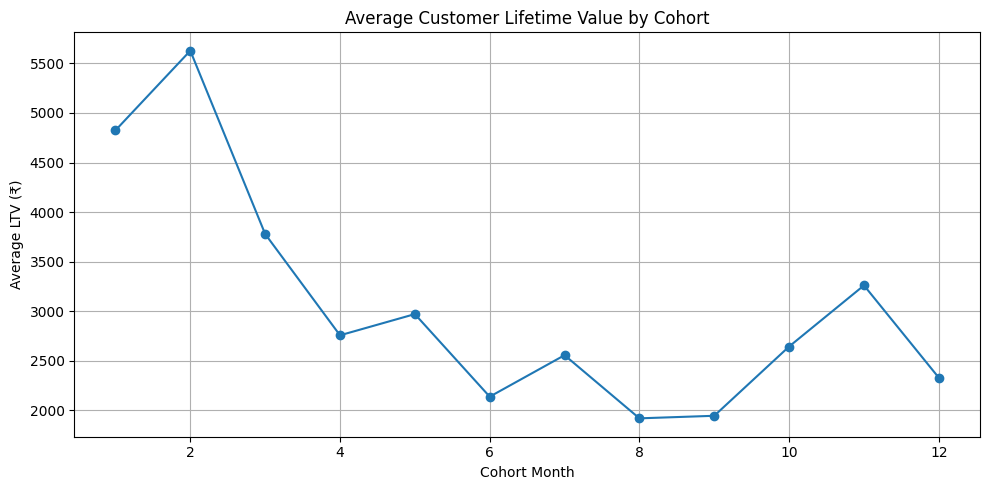

Cohort_Month
1     4824.74
2     5628.53
3     3779.07
4     2756.63
5     2970.52
6     2137.23
7     2555.91
8     1918.61
9     1944.41
10    2643.41
11    3260.17
12    2328.40
Name: Revenue, dtype: float64


In [ ]:
#Assign cohort month (month of first purchase)
df['Cohort_Month'] = df['AcquisitionMonth']
print(df['Cohort_Month'])

# Step 3: Calculate total revenue per customer per cohort
lifetime_value = df.groupby(['Cohort_Month', 'CustomerID'])['Revenue'].sum().reset_index()

# Step 4: Compute average LTV per cohort
ltv_by_cohort = lifetime_value.groupby('Cohort_Month')['Revenue'].mean().round(2)

# Step 5: Plot the result
plt.figure(figsize=(10, 5))
ltv_by_cohort.plot(marker='o')
plt.title('Average Customer Lifetime Value by Cohort')
plt.xlabel('Cohort Month')
plt.ylabel('Average LTV (₹)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Optional: Display the values
print(ltv_by_cohort)

**Insights**:
Customers acquired in early 2019 (Jan–Mar) have significantly higher LTV, indicating better quality or engagement.

Post-June cohorts show a consistent drop in LTV, suggesting either:

Decline in acquisition targeting quality

Drop in follow-up/retention strategies

Seasonality or reduced campaign effectiveness.


**Output**:
Each point on the plot shows the average lifetime revenue generated by customers who made their first purchase in that month.

Helps assess which acquisition months yielded higher long-term value.

**Next Section:**

Do customers who use coupons have a different **average transaction value** compared to those who do not?
Conduct a **statistical test** to validate this hypothesis. What implications does this have for the company’s discount and coupon strategies?

In [ ]:
from scipy.stats import ttest_ind

# Step 3: Define order value (revenue per transaction)
df['Order_Value'] = df['Revenue']
df.info()

# Step 4: Separate the two groups
used_group = df[df['Coupon_Status'] == 'Used']['Order_Value']
not_used_group = df[df['Coupon_Status'] != 'Used']['Order_Value']
print(f"Used Group: {used_group}")
print(f"Not Used Group: {not_used_group}")

# Step 5: Perform independent t-test
t_stat, p_value = ttest_ind(used_group, not_used_group, equal_var=False)

# Step 6: Print results
print(f"Mean Order Value (Coupon Used): ₹{used_group.mean():.2f}")
print(f"Mean Order Value (No Coupon): ₹{not_used_group.mean():.2f}")
print(f"T-Statistic: {t_stat:.3f}")
print(f"P-Value: {p_value:.4f}")
print("Statistically Significant?" , "Yes" if p_value < 0.05 else "No")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CustomerID           52924 non-null  int64         
 1   Transaction_ID       52924 non-null  int64         
 2   Transaction_Date     52924 non-null  datetime64[ns]
 3   Product_SKU          52924 non-null  object        
 4   Product_Description  52924 non-null  object        
 5   Product_Category     52924 non-null  object        
 6   Quantity             52924 non-null  int64         
 7   Avg_Price            52924 non-null  float64       
 8   Delivery_Charges     52924 non-null  float64       
 9   Coupon_Status        52924 non-null  object        
 10  Month                52924 non-null  int32         
 11  Year                 52924 non-null  int32         
 12  AcquisitionMonth     52924 non-null  int32         
 13  Customer_Type        52924 non-

**Interpretation**:
Although customers using coupons spend slightly less on average, the difference is not statistically significant.

The variation could be due to chance, not a true behavioral difference.

Mean order (coupon used)    = ₹87.18  
Mean order (no coupon used) = ₹88.81  
p-value                     = 0.2919
This means:

There’s a 29% chance this difference is just random.

Since 29% > 5%, it's not rare enough to say, “this proves coupon users spend less.”

**Next Section:**

Do **purchase behaviors** (e.g., order frequency, order value) vary significantly across different demographic groups or pricing factors (e.g., delivery charges)?
Test for differences in purchase behavior across locations, age groups, or delivery charge tiers. How can these insights inform personalized marketing and pricing strategies?

In [ ]:
from scipy.stats import f_oneway

customers_df = pd.read_excel("CustomersData.xlsx")

# Step 1: Aggregate purchase behavior per customer
customer_behavior = df.groupby('CustomerID').agg({
    'Transaction_ID': 'nunique',
    'Revenue': 'mean',
    'Delivery_Charges': 'mean'
}).rename(columns={
    'Transaction_ID': 'Order_Frequency',
    'Revenue': 'Avg_Order_Value',
    'Delivery_Charges': 'Avg_Delivery_Charge'
}).reset_index()

# Step 2: Merge with customer demographics
merged_df = pd.merge(customer_behavior, customers_df, on='CustomerID')

# Step 3: Create bins
merged_df['Delivery_Tier'] = pd.qcut(merged_df['Avg_Delivery_Charge'], 3, labels=['Low', 'Medium', 'High'])

# If Age exists, group into age bins
if 'Age' in merged_df.columns:
    merged_df['Age_Group'] = pd.cut(merged_df['Age'], bins=[18, 25, 35, 50, 70], labels=['18-25', '26-35', '36-50', '51-70'])

# Step 4: ANOVA tests and group-wise means
results = {}

# Age Group
if 'Age_Group' in merged_df.columns:
    age_groups = merged_df.groupby('Age_Group')['Avg_Order_Value'].apply(list).tolist()
    #groupby('Location')['Avg_Order_Value'] → groups the column by Location
    #.apply(list) → converts each group into a list
    #.tolist() → converts the resulting Series of lists into a list of lists

    results['ANOVA_p_value_Age_Group'] = round(f_oneway(*age_groups).pvalue, 4)
    #The * operator unpacks the list so it becomes:
      #f_oneway(group1, group2, group3)
      #This tests whether the means of the groups are significantly different.

    print("\nAverage Order Value by Age Group:")
    print(merged_df.groupby('Age_Group')['Avg_Order_Value'].mean().round(2))

# Location
location_groups = merged_df.groupby('Location')['Avg_Order_Value'].apply(list).tolist()
results['ANOVA_p_value_Location'] = round(f_oneway(*location_groups).pvalue, 4)
print("\nAverage Order Value by Location:")
print(merged_df.groupby('Location')['Avg_Order_Value'].mean().round(2))

# Delivery Tier
tier_groups = merged_df.groupby('Delivery_Tier')['Avg_Order_Value'].apply(list).tolist()
results['ANOVA_p_value_Delivery_Tier'] = round(f_oneway(*tier_groups).pvalue, 4)
print("\nAverage Order Value by Delivery Tier:")
print(merged_df.groupby('Delivery_Tier')['Avg_Order_Value'].mean().round(2))

# Step 5: Print p-values
print("\nANOVA P-Values (p < 0.05 means significant difference):")
print(results)


Average Order Value by Location:
Location
California       86.13
Chicago          88.60
New Jersey       89.22
New York         83.07
Washington DC    97.62
Name: Avg_Order_Value, dtype: float64

Average Order Value by Delivery Tier:
Delivery_Tier
Low       76.56
Medium    90.47
High      94.36
Name: Avg_Order_Value, dtype: float64

ANOVA P-Values (p < 0.05 means significant difference):
{'ANOVA_p_value_Location': np.float64(0.2923), 'ANOVA_p_value_Delivery_Tier': np.float64(0.0)}


<ipython-input-32-217aac4d5a14>:51: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tier_groups = merged_df.groupby('Delivery_Tier')['Avg_Order_Value'].apply(list).tolist()
<ipython-input-32-217aac4d5a14>:54: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(merged_df.groupby('Delivery_Tier')['Avg_Order_Value'].mean().round(2))


** Strategic Insights:**
**Delivery Pricing Strategy**
Customers paying higher delivery charges also spend more per order.

**Strategies:**

Offer premium delivery with added perks to high-value customers.

Encourage upgrades to higher tiers through loyalty incentives.

**Next Section:**

Does **customer tenure** impact **purchase frequency**?Analyze the relationship between customer tenure and purchase frequency. How can this insight be used to improve customer engagement and retention strategies?

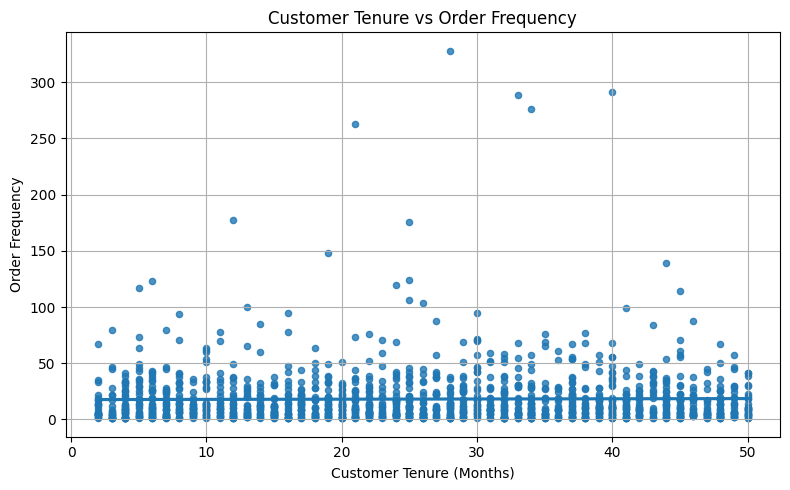

Pearson Correlation: 0.010
P-Value: 0.7069
Statistically Significant? No


In [ ]:
from scipy.stats import pearsonr

#Calculate order frequency per customer
frequency_df = df.groupby('CustomerID')['Transaction_ID'].nunique().reset_index()
frequency_df.rename(columns={'Transaction_ID': 'Order_Frequency'}, inplace=True)

# Step 4: Merge with customer tenure
merged_df = pd.merge(frequency_df, customers_df[['CustomerID', 'Tenure_Months']], on='CustomerID')

# Step 5: Compute Pearson correlation
correlation, p_value = pearsonr(merged_df['Tenure_Months'], merged_df['Order_Frequency'])

# Step 6: Plot regression
plt.figure(figsize=(8, 5))
sns.regplot(data=merged_df, x='Tenure_Months', y='Order_Frequency', ci=None, scatter_kws={"s": 20})
plt.title('Customer Tenure vs Order Frequency')
plt.xlabel('Customer Tenure (Months)')
plt.ylabel('Order Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 7: Print result
print(f"Pearson Correlation: {correlation:.3f}")
print(f"P-Value: {p_value:.4f}")
print("Statistically Significant?" , "Yes" if p_value < 0.05 else "No")

**Next Section:**

Analyze the **relationship between delivery charges and order behavior**. Are there opportunities to optimize delivery pricing to increase order quantities or revenue?

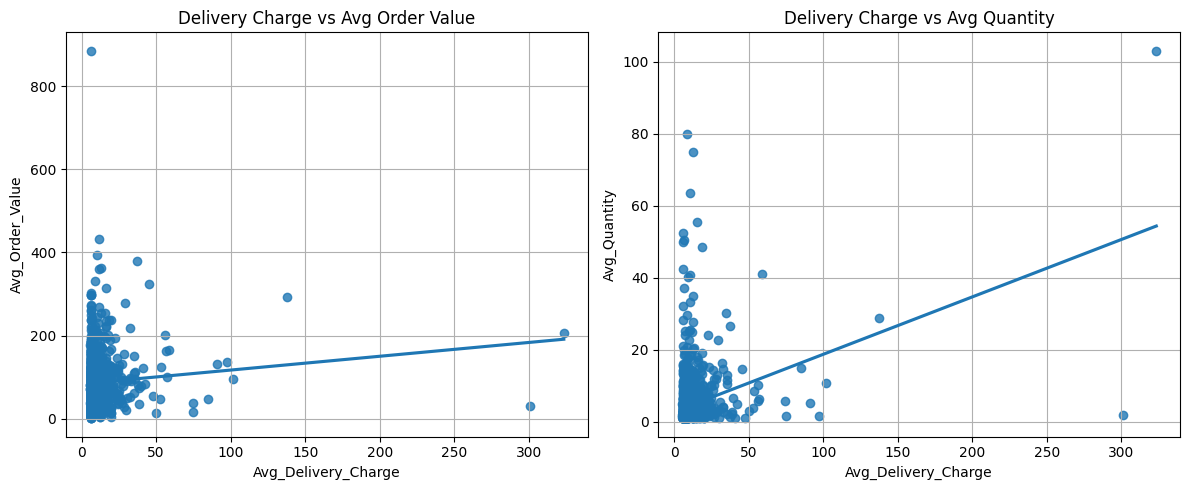

Correlation (Delivery vs Avg Order Value): 0.083 | P-Value: 0.0015
Correlation (Delivery vs Avg Quantity): 0.327 | P-Value: 0.0000
Statistically Significant? (Value): Yes
Statistically Significant? (Quantity): Yes


In [ ]:
# Step 2: Aggregate customer-level metrics
customer_behavior = df.groupby('CustomerID').agg({
    'Transaction_ID': 'nunique',
    'Revenue': 'mean',
    'Delivery_Charges': 'mean',
    'Quantity': 'mean'
}).rename(columns={
    'Transaction_ID': 'Order_Frequency',
    'Revenue': 'Avg_Order_Value',
    'Delivery_Charges': 'Avg_Delivery_Charge',
    'Quantity': 'Avg_Quantity'
}).reset_index()

# Step 3: Correlation Tests
corr_value, p_value = pearsonr(customer_behavior['Avg_Delivery_Charge'], customer_behavior['Avg_Order_Value'])
corr_quantity, p_quantity = pearsonr(customer_behavior['Avg_Delivery_Charge'], customer_behavior['Avg_Quantity'])

# Step 4: Plot relationships
plt.figure(figsize=(12, 5))

# Delivery vs Order Value
plt.subplot(1, 2, 1)
sns.regplot(data=customer_behavior, x='Avg_Delivery_Charge', y='Avg_Order_Value', ci=None)
plt.title('Delivery Charge vs Avg Order Value')
plt.grid(True)

# Delivery vs Quantity
plt.subplot(1, 2, 2)
sns.regplot(data=customer_behavior, x='Avg_Delivery_Charge', y='Avg_Quantity', ci=None)
plt.title('Delivery Charge vs Avg Quantity')
plt.grid(True)

plt.tight_layout()
plt.show()

# Step 5: Print correlation results
print(f"Correlation (Delivery vs Avg Order Value): {corr_value:.3f} | P-Value: {p_value:.4f}")
print(f"Correlation (Delivery vs Avg Quantity): {corr_quantity:.3f} | P-Value: {p_quantity:.4f}")
print("Statistically Significant? (Value):", "Yes" if p_value < 0.05 else "No")
print("Statistically Significant? (Quantity):", "Yes" if p_quantity < 0.05 else "No")

**Next Section: **

Identify **seasonal trends in sales by category and location.** How can the company prepare for peak and off-peak seasons to maximize revenue?

Product_Category  Accessories  Android   Apparel  Backpacks      Bags  \
Month                                                                   
1                       51.57    74.24  38300.87     268.19  10903.63   
2                         NaN    19.99  37990.09     559.94  17969.55   
3                       59.99   115.93  59059.02     639.93  14045.65   
4                      166.96    39.98  88138.14    1015.04  11385.03   
5                      141.14    91.95  58850.90    1371.76   9962.99   
6                      207.73   171.90  45941.01     298.36  12867.37   
7                     1862.36   115.91  65356.00     719.92  11933.01   
8                      322.66    81.13  53304.78    1339.85  16271.60   
9                     1271.24      NaN  55663.53     619.93   9255.85   
10                     805.19      NaN  21718.72    1579.81  14436.38   
11                    1691.57      NaN  18585.80     359.96  12905.98   
12                     715.47      NaN  48236.94   

<Figure size 1200x800 with 0 Axes>

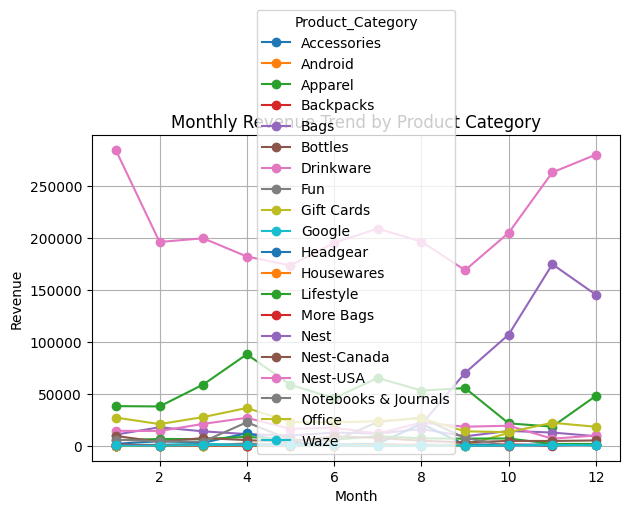

<Figure size 1200x800 with 0 Axes>

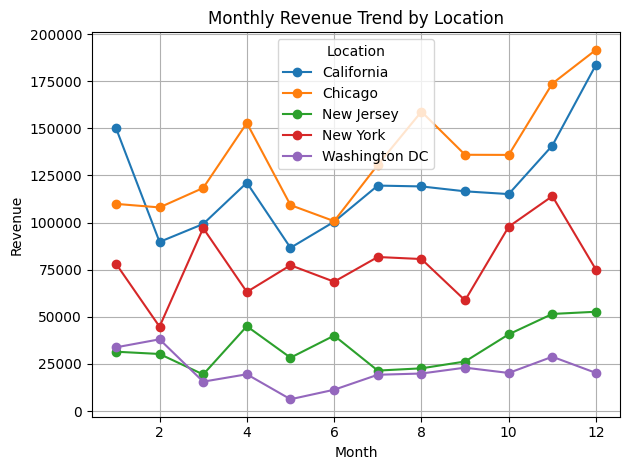

In [ ]:
 #Merge with customer data to get location info
merged_df = pd.merge(df, customers_df[['CustomerID', 'Location']], on='CustomerID', how='left')

# Step 4: Group and summarize monthly revenue
monthly_trends = merged_df.groupby(['Month', 'Product_Category', 'Location'])['Revenue'].sum().reset_index()

# Step 5: Pivot data for plotting
pivot_category = monthly_trends.pivot_table(index='Month', columns='Product_Category', values='Revenue', aggfunc='sum')
pivot_location = monthly_trends.pivot_table(index='Month', columns='Location', values='Revenue', aggfunc='sum')

print(pivot_category)
print(pivot_location)

# Step 6: Plot revenue trend by Product Category
plt.figure(figsize=(12, 8))
pivot_category.plot(marker='o', title='Monthly Revenue Trend by Product Category')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 7: Plot revenue trend by Location
plt.figure(figsize=(12, 8))
pivot_location.plot(marker='o', title='Monthly Revenue Trend by Location')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.grid(True)
plt.tight_layout()
plt.show()

**Result:**
Shows which months are peak for each product category and region

Helps you prepare for seasonal spikes or plan campaigns for slow months

In [ ]:
# Step 6: Identify peak month for each product category
peak_by_category = pivot_category.idxmax().reset_index()
peak_by_category.columns = ['Product_Category', 'Peak_Month']

# Step 7: Identify peak month for each location
peak_by_location = pivot_location.idxmax().reset_index()
peak_by_location.columns = ['Location', 'Peak_Month']

# Step 8: Display results
print("Peak Months by Product Category:")
print(peak_by_category)

print("\nPeak Months by Location:")
print(peak_by_location)

Peak Months by Product Category:
        Product_Category  Peak_Month
0            Accessories           7
1                Android           6
2                Apparel           4
3              Backpacks          10
4                   Bags           2
5                Bottles           9
6              Drinkware           4
7                    Fun           4
8             Gift Cards          10
9                 Google           3
10              Headgear           8
11            Housewares           7
12             Lifestyle           7
13             More Bags           1
14                  Nest          11
15           Nest-Canada           1
16              Nest-USA           1
17  Notebooks & Journals           8
18                Office           4
19                  Waze          11

Peak Months by Location:
        Location  Peak_Month
0     California          12
1        Chicago          12
2     New Jersey          12
3       New York          11
4  Washington DC   

**Peak Months by Category:**

Product Category	    Peak Month

*   Accessories	          Jul 2019
*   Android	              Jun 2019
*   Apparel	              Apr 2019
*   Backpacks	            Oct 2019
*   Bags	                Feb 2019

**Peak Months by Location:**
Location	Peak Month

*   California	Dec 2019
*   Chicago	    Dec 2019
*   New Jersey	Dec 2019
*   New York	  Nov 2019

**Strategic Recommendations:**
Plan inventory and campaigns for these peak months to maximize revenue.

Launch early-bird promotions one month before peaks.

Use off-peak months for loyalty or clearance offers.

**Next Section:**

**Analyze daily sales trends** to identify high-performing and low-performing days. What strategies can be implemented to boost sales on slower days?

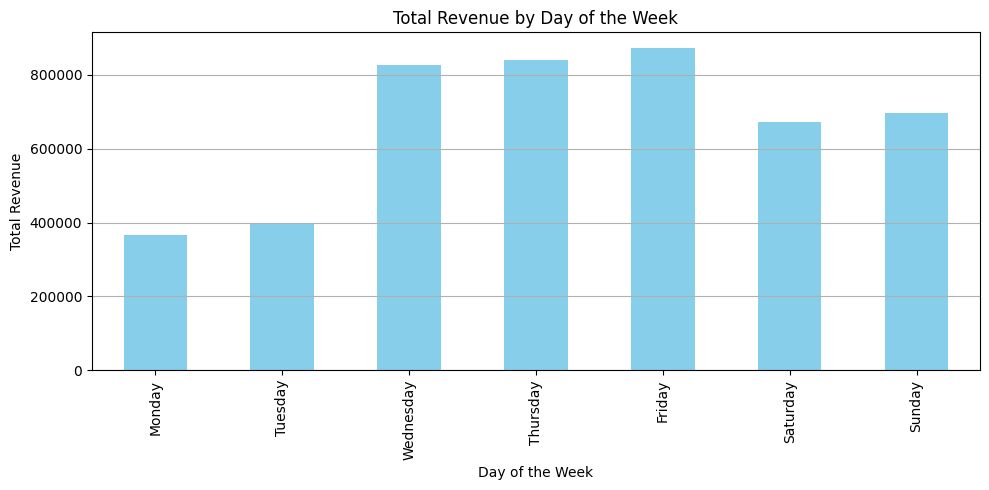

In [ ]:
# Step 3: Extract day of the week
df['DayOfWeek'] = df['Transaction_Date'].dt.day_name()

# Step 4: Group by day and sum revenue
daily_sales = df.groupby('DayOfWeek')['Revenue'].sum()

# Step 5: Reorder days for proper weekday sequence
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_sales = daily_sales.reindex(ordered_days)

# Step 6: Plot the results
plt.figure(figsize=(10, 5))
daily_sales.plot(kind='bar', color='skyblue')
plt.title('Total Revenue by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Revenue')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

 **Insights:**

Friday is the highest-performing day — likely influenced by pre-weekend shopping.

Monday and Tuesday are the slowest sales days.